<a href="https://colab.research.google.com/github/mdazab/DATA5322-Homework-4/blob/main/hofidar_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Practical Homework 4: Unsupervised Learning

## Load Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Load Data

In [22]:
url = "https://raw.githubusercontent.com/mdazab/DATA5322-Homework-4/01ab29286c5ef1532b2ad99474b2236521119465/Hofidar_Cost_Center_Report.csv"
df = pd.read_csv(url)

df.head()

,Year,License Number,Hospital Name,Acct #,Cost Center,ID FTE s,Units of Measure,Salaries Wages,Employee Benefits,Professional Fees,...,Utilities,Other Noncategorized Expenses,Cost Recoveries,Operating Expenses,Allocated Expenses,Plant Sq Feet,Dietary Meals,Housekeeping Hours,Laundry Dry Lbs,Nursing FTE s
0,2018,1,Swedish Health Services DBA Swedish Medical Cent,6010,ICU or Combined ICU-CCU,293.73,29562,30226470,4609431,1896584,...,0,0,1390,41624622,43082868,85986,192205,10901,1292872,192.05
1,2019,1,Swedish Health Services DBA Swedish Medical Cent,6010,ICU or Combined ICU-CCU,315.34,58040,34310765,5176437,2695345,...,0,0,16480,47653505,47164648,85986,225238,11080,1537737,207.90
2,2020,1,Swedish Health Services DBA Swedish Medical Cent,6010,ICU or Combined ICU-CCU,312.25,61858,36778517,5080150,3275253,...,0,0,6556,51674146,47904192,85986,237665,10831,1638252,205.13
3,2021,1,Swedish Health Services DBA Swedish Medical Cent,6010,ICU or Combined ICU-CCU,283.63,56193,36710859,4990817,3525876,...,0,0,33657,51660408,48273323,85986,0,386564,15922,181.60
4,2022,1,Swedish Health Services DBA Swedish Medical Cent,6010,ICU or Combined ICU-CCU,309.64,13801,23232296,1105754,198446,...,0,77151,0,28887656,0,50191,0,7496,0,189.40


## Remove Categorial Variables

In [23]:
cat_names = df[['Year', 'License Number', 'Hospital Name', 'Acct #', 'Cost Center']]
df_clean = df.drop(columns=['Year', 'License Number', 'Hospital Name', 'Acct #', 'Cost Center'])


## Data QC

In [29]:
df_vis = df_clean.apply(pd.to_numeric, errors='coerce')
df_vis[df_vis < 0] = np.nan


n_rows = len(df_vis)


summary = pd.DataFrame({
    'Zero Count': (df_vis == 0).sum(),
    'NaN Count': df_vis.isna().sum()
})
summary['Zero %'] = (summary['Zero Count'] / n_rows) * 100
summary['NaN %'] = (summary['NaN Count'] / n_rows) * 100


summary = summary[(summary['Zero Count'] > 0) | (summary['NaN Count'] > 0)]
summary = summary.sort_values(by='NaN %', ascending=False)


summary.style.format({
    'Zero %': '{:.2f}%',
    'NaN %': '{:.3f}%',
    'Zero Count': '{:,}',
    'NaN Count': '{:,}'
})

,Zero Count,NaN Count,Zero %,NaN %
Supplies,"24,524",471,56.75%,1.090%
Other Direct Exp,"26,161",394,60.53%,0.912%
Operating Expenses,"21,596",335,49.97%,0.775%
Purch Serv Other,"25,188",298,58.28%,0.690%
Rentals Leases,"33,864",231,78.36%,0.535%
Other Noncategorized Expenses,"36,818",211,85.19%,0.488%
Cost Recoveries,"37,354",199,86.43%,0.460%
Professional Fees,"35,990",162,83.28%,0.375%
Inpatient Revenue,"33,766",118,78.13%,0.273%
Total Revenue,"33,070",90,76.52%,0.208%


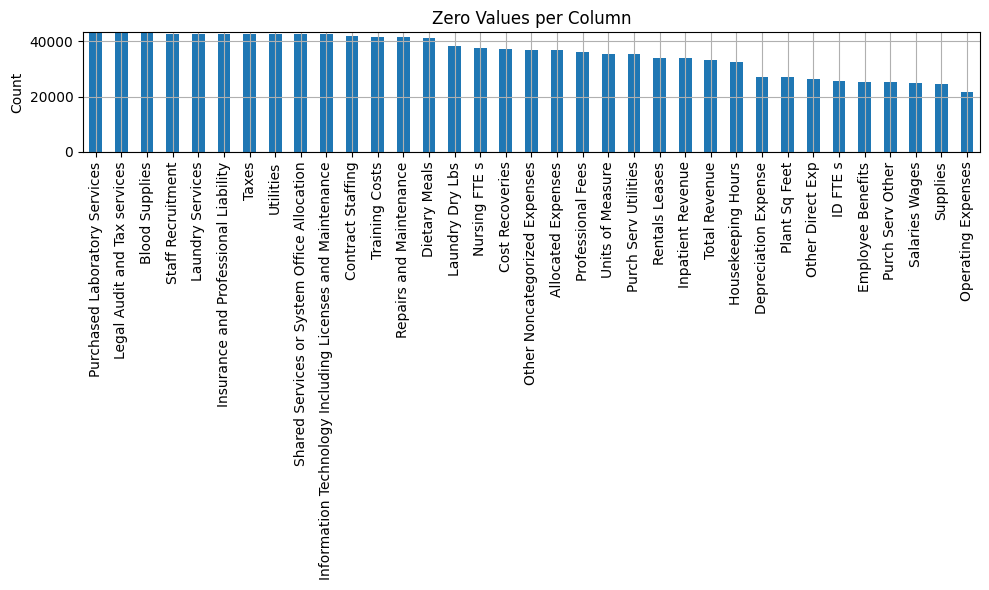

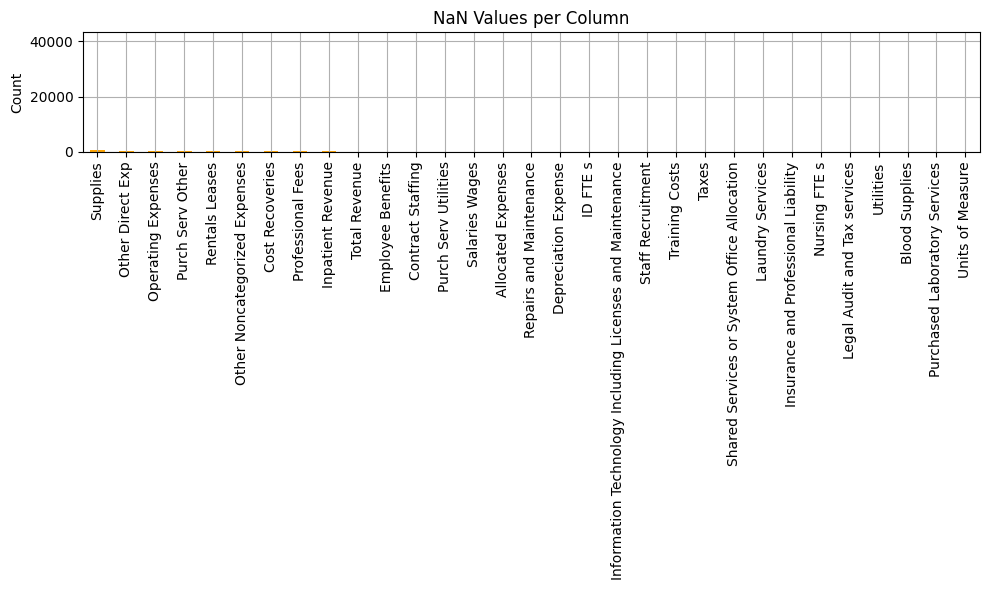

In [25]:
zero_counts = (df_vis == 0).sum().sort_values(ascending=False)
zero_counts = zero_counts[zero_counts > 0]

plt.figure(figsize=(10, 6))
zero_counts.plot(kind='bar')
plt.ylim(0, len(df_vis))
plt.title("Zero Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


nan_counts = df_vis.isna().sum().sort_values(ascending=False)
nan_counts = nan_counts[nan_counts > 0]

plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='orange')
plt.ylim(0, len(df_vis))
plt.title("NaN Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()